In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score, precision_score, recall_score, f1_score


In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [9]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [10]:
df["Gender"] = df["Gender"].astype("category")
df.dtypes

User ID               int64
Gender             category
Age                   int64
EstimatedSalary       int64
Purchased             int64
dtype: object

In [11]:
label_encoder = LabelEncoder()

In [12]:
df["Gender_encoded"] = label_encoder.fit_transform(df["Gender"])
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_encoded
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [13]:
df.drop(['Gender'], axis='columns', inplace=True)

In [14]:
df.shape

(400, 5)

In [15]:
df.dtypes

User ID            int64
Age                int64
EstimatedSalary    int64
Purchased          int64
Gender_encoded     int64
dtype: object

In [16]:
X = df[["Age", "EstimatedSalary"]]
X.shape

(400, 2)

In [17]:
y = df["Purchased"]
y.shape

(400,)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print(X_train.shape)
print(X_test.shape)

(300, 2)
(100, 2)


In [21]:
model = LogisticRegression(random_state = 0,solver = 'lbfgs')

In [22]:
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [23]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

print(y_test_predicted)

[0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0]


In [24]:
cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10)

array([0.83333333, 0.86666667, 0.76666667, 0.93333333, 0.9       ,
       0.7       , 0.9       , 0.73333333, 0.83333333, 0.86666667])

In [25]:
cross_val_score(model, X_test, y_test, scoring = 'accuracy', cv = 10)

array([0.9, 0.9, 0.8, 1. , 0.9, 0.9, 1. , 0.8, 0.9, 0.8])

In [26]:
model.score(X_test, y_test)

0.86

In [27]:
print(y_test.shape)
print(y_test_predicted.shape)

(100,)
(100,)


In [28]:
cm = confusion_matrix(y_test, y_test_predicted)
print("Confusion matrix : ", cm)

Confusion matrix :  [[61  2]
 [12 25]]


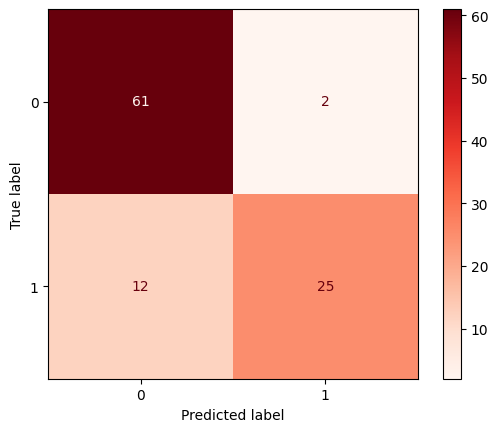

In [29]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
conf_matrix.plot(cmap=plt.cm.Reds)
plt.rcParams['figure.figsize'] = (8, 6)
plt.show()

<Axes: >

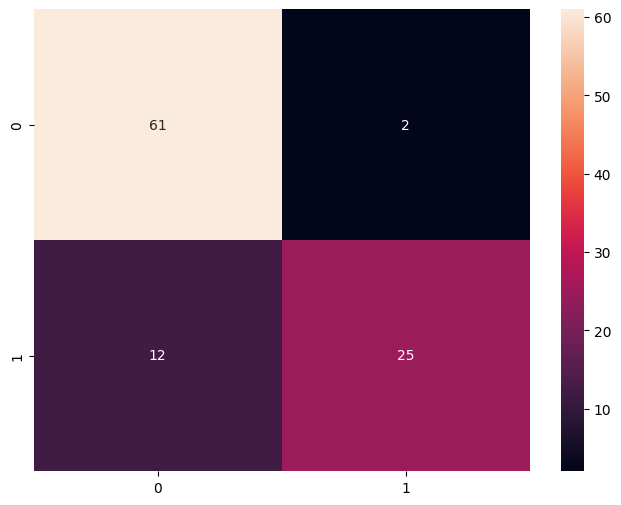

In [30]:
sns.heatmap(cm, annot = True)

In [31]:
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        63
           1       0.93      0.68      0.78        37

    accuracy                           0.86       100
   macro avg       0.88      0.82      0.84       100
weighted avg       0.87      0.86      0.85       100



In [32]:
tp, fn, fp, tn = confusion_matrix(y_test,y_test_predicted,labels=[1,0]).reshape(-1)

In [33]:
print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,y_test_predicted)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 0.86
Error Rate:  0.14
Sensitivity (Recall or True positive rate) : 0.6756756756756757
Specificity (True negative rate) : 0.9682539682539683
Precision (Positive predictive value) : 0.9259259259259259
False Positive Rate : 0.031746031746031744


Visualizations

<Axes: xlabel='Age', ylabel='Density'>

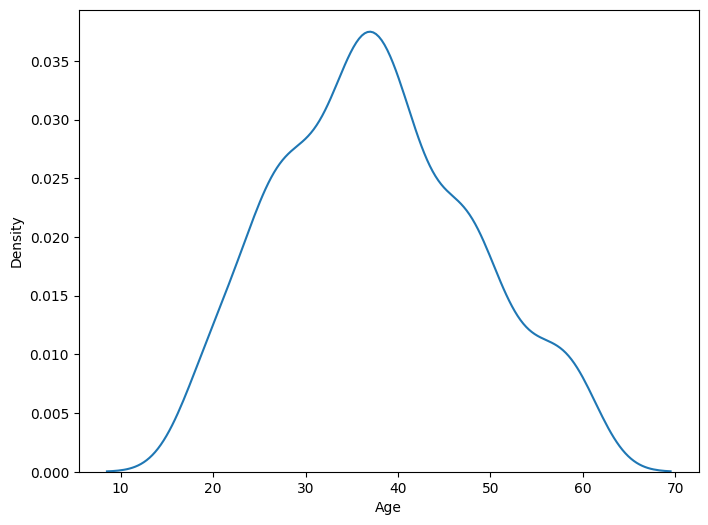

In [34]:
# kdeplots
sns.kdeplot(df["Age"])

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

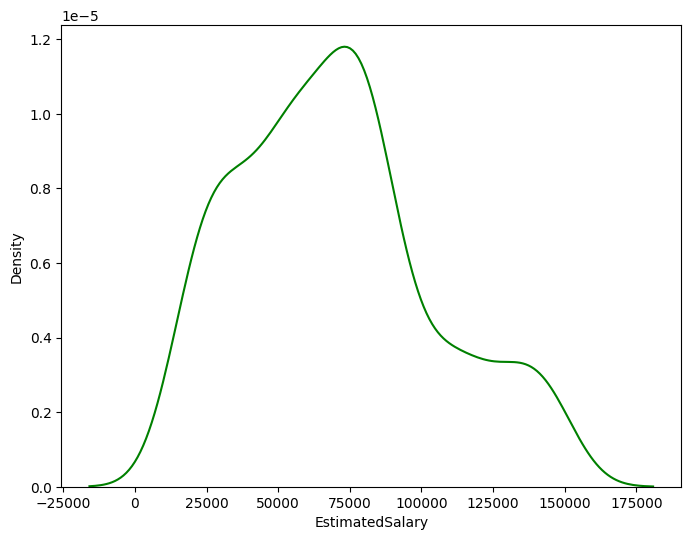

In [35]:
sns.kdeplot(df["EstimatedSalary"], color = 'green')

<Axes: xlabel='Gender_encoded', ylabel='Density'>

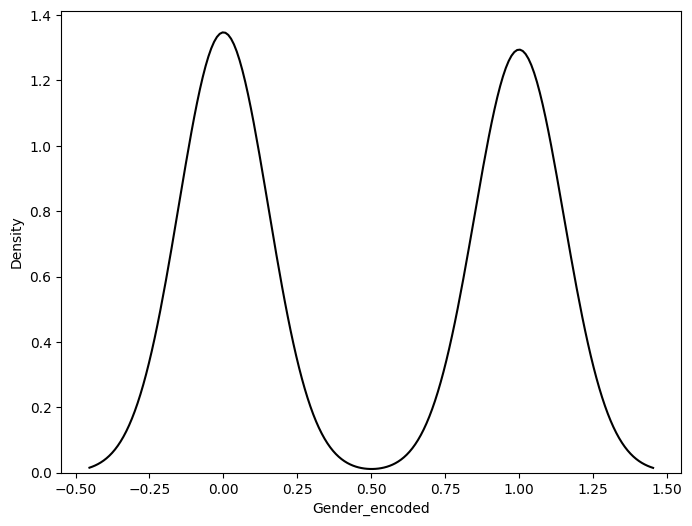

In [36]:
sns.kdeplot(df["Gender_encoded"], color = 'k')

<Axes: xlabel='Purchased', ylabel='Density'>

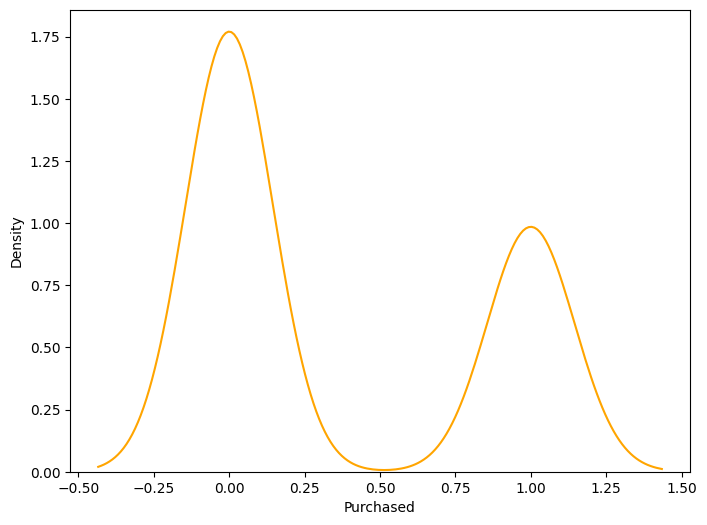

In [37]:
sns.kdeplot(df["Purchased"], color='orange')

In [38]:
df["Age"].max()

60

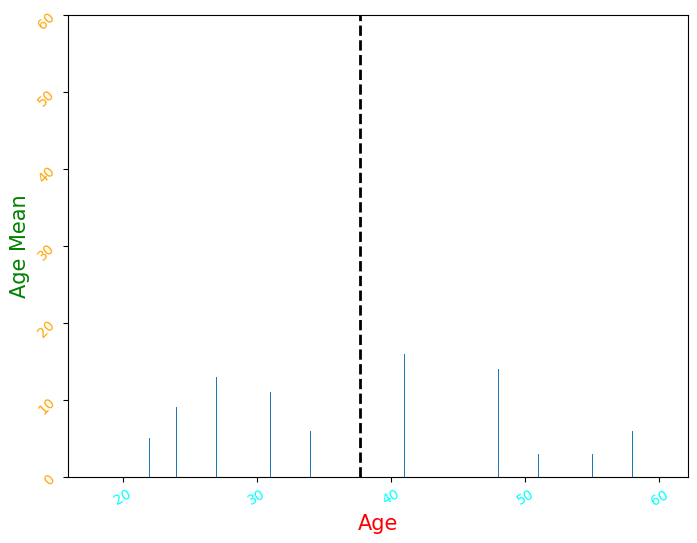

In [39]:
# Axvline -
plt.hist(df["Age"], 1500)
plt.axvline(df["Age"].mean(), color='k', linestyle='dashed', linewidth=2)
plt.xlabel("Age", color='r', fontsize=15)
plt.ylabel("Age Mean", color='g', fontsize=15)
plt.xticks(rotation=30, color='cyan')
plt.yticks([0, 10, 20, 30, 40, 50, 60], rotation=45, color='orange')
plt.show()

In [40]:
max_salary = df["EstimatedSalary"].max()
min_salary = df["EstimatedSalary"].min()
mean_salary = df["EstimatedSalary"].mean()

print("The maximum salary : ", max_salary)
print("The minimum salary : ", min_salary)
print("The average salary : ", mean_salary)

The maximum salary :  150000
The minimum salary :  15000
The average salary :  69742.5


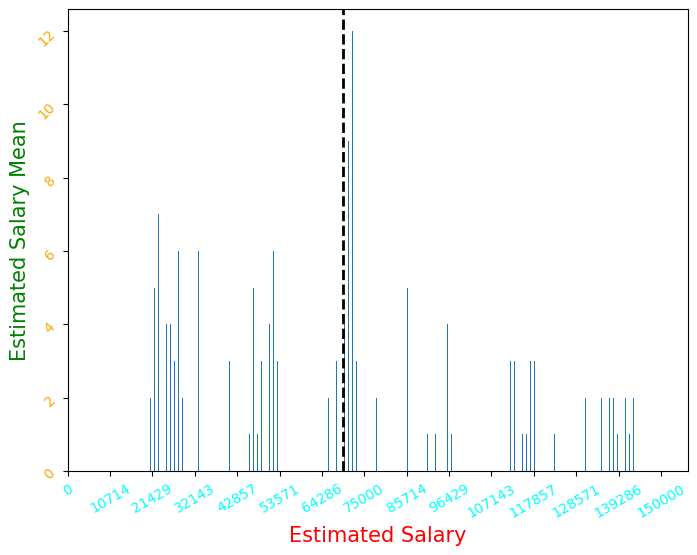

In [41]:
plt.hist(df["EstimatedSalary"], 1500)
plt.axvline(df["EstimatedSalary"].mean(), color='k', linestyle='dashed', linewidth=2)
plt.xlabel("Estimated Salary", color='r', fontsize=15)
plt.ylabel("Estimated Salary Mean", color='g', fontsize=15)
plt.xticks(np.linspace(0, 150000, 15), rotation=30, color='cyan')
plt.yticks(rotation=45, color='orange')
plt.show()

<ipython-input-42-a0590e3011ef>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


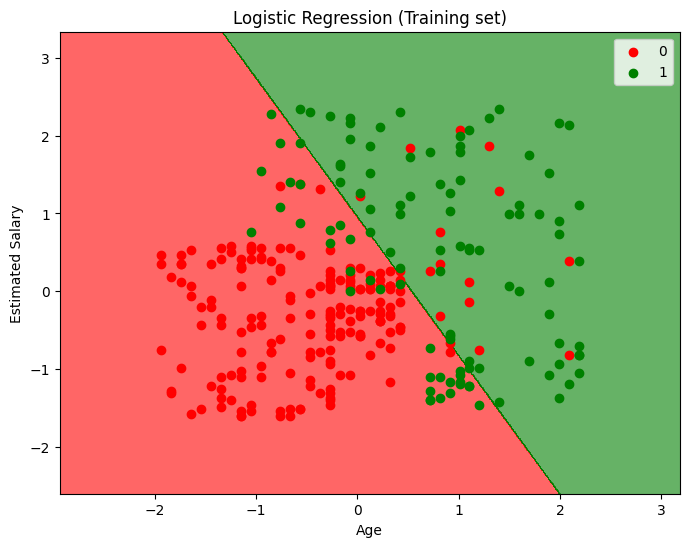

In [42]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-43-fa47447048e3>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


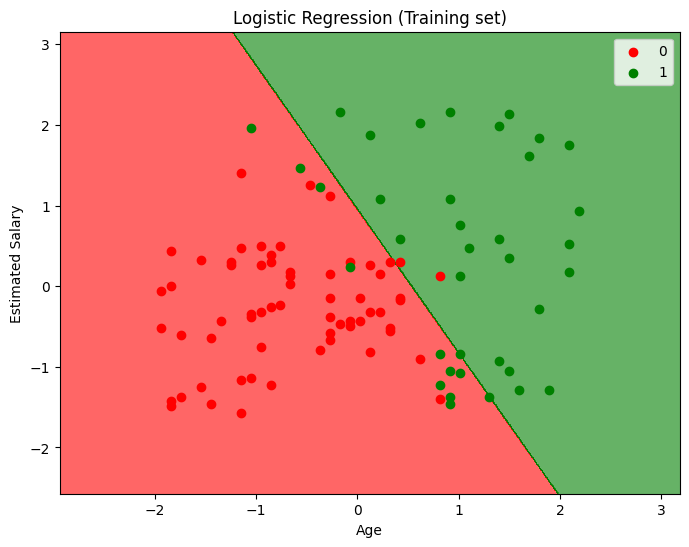

In [43]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.6, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()